# <center>Lab Assignment 3: Hopfield networks</center>

In [1]:
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt

### Implement the network class

In [2]:
class HopfieldNetwork:
    def __init__(self):
        self.W = None

    def train(self, X: np.ndarray):
        M, N = len(X), len(X[0])
        self.W = (1 / N) * X.dot(X.T)
        np.fill_diagonal(self.W, 0)

    def print_W(self):
        for i in range(self.W.shape[0]):
            for j in range(self.W.shape[1]):
                print("%.1f  \t" % (self.W[i][j]),  end='')
            print()

    def update_async(self, p_start, mode: str = 'sequential', log: list = None):
        """
        Apply the update rule on the input pattern V to get the restored pattern
        which is an attractor in the network's storage
        :param mode:
        :param p_start: the start pattern
        :param log: energy log array to be filled
        :return: the restored pattern
        """
        V = np.copy(p_start)
        m = len(V)
        indices = [i for i in range(m)]
        iter = 1
        while True:
            if log is not None:
                e = self.energyOf(V)
                log.append(e)
            cnt = 0
            if mode == 'random':
                indices = np.random.permutation(indices)
            for i in indices:
                value_old = V[i]
                value_new = np.sign(self.W[:, i].dot(V))
                if value_new != value_old:
                    V[i] = value_new
                    cnt += 1
                # print(i, value_old, value_new, self.W[:, i].dot(V))

            if cnt == 0:
                # print("Converged in %s iterations" % iter)
                break
            if iter > 1e3:
                break
            iter += 1

        return V

    def update_sync(self, p_start, log: list = None):
        """
        Implementation of the little model
        :param p_start: the start pattern
        :param log: energy log array to be filled
        :return: the restored pattern
        """
        V = np.copy(p_start)
        iter = 1
        while True:
            if log is not None:
                e = self.energyOf(V)
                log.append(e)
            V_new = np.sign(self.W.dot(V))
            V = V_new
            diff = np.sum(np.abs(V - V_new))
            if diff == 0:
                break
            iter += 1

        return V

            
    def energyOf(self, x):
        """
        Compute the energy of the given state
        :param x: a n-by-1 array pattern which represents a state
        :return: a float value
        """
        # take it as a quadratic form
        return - x.dot(self.W).dot(x)

    @staticmethod
    def plot_energy(energy_log):
        for i in range(len(energy_log)):
            plt.scatter(i, energy_log[i])
        plt.plot(energy_log)
        plt.title("Energy changes")
        plt.show()

### Construct input patterns for training

In [3]:
x1 = [-1, -1, 1, -1, 1, -1, -1, 1]
x2 = [-1, -1, -1, -1, -1, 1, -1, -1]
x3 = [-1, 1, 1, -1, -1, 1, -1, 1]
X = np.array([x1, x2, x3]).T

### Train the network

In [4]:
model = HopfieldNetwork()
model.train(X)

# 3. Tasks and questions

## 3.1 Convergence and attractors

In [5]:
# 1. apply the update rule
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])

In [6]:
rp1 = model.update_async(x1d)
print(rp1)
print((rp1 == x1).all())            

[-1 -1  1 -1  1 -1 -1  1]
True


In [7]:
rp2 = model.update_async(x2d)
print(rp2)
print((rp2 == x2).all())

[-1 -1 -1 -1 -1  1 -1 -1]
True


In [8]:
rp3 = model.update_async(x3d)
print(rp3)
print((rp3 == x3).all())

[-1  1  1 -1 -1  1 -1  1]
True


In [9]:
# 2. How many attractors are there in this network? Answer: 6
N = 8
k = 2 ** N
rp = np.ones([k, N])

for i in range(k):
    l = len(bin(i)) - 2
    for j in range(l):
        if bin(i)[j + 2] == '1':
            rp[i, N - l + j] = -1

n = 0

for i in range(k):
    A = rp[i]
    B = model.update_async(A)
    if (A == B).all():
        n += 1
        print('attractor', n, ':', A)

attractor 1 : [ 1.  1.  1.  1.  1. -1.  1.  1.]
attractor 2 : [ 1.  1. -1.  1. -1.  1.  1. -1.]
attractor 3 : [ 1. -1. -1.  1.  1. -1.  1. -1.]
attractor 4 : [-1.  1.  1. -1. -1.  1. -1.  1.]
attractor 5 : [-1. -1.  1. -1.  1. -1. -1.  1.]
attractor 6 : [-1. -1. -1. -1. -1.  1. -1. -1.]


In [10]:
# 3. What happens when making the start pattern more dissimilar to the stored ones?

In [11]:
x3ds = np.array([1, -1, -1, 1, 1, 1, -1, 1])
r3ds = model.update_async(x3ds)
print(r3ds)
print((r3ds == x3).all())

[-1  1  1 -1 -1  1 -1  1]
True


## 3.2 Sequential update

In [12]:
# read data stored in pict.dat

In [13]:
def read_data(file_name):
    f = open(file_name)
    raw_data = f.read().split(',')
    length = len(raw_data)
    N = int(length / 1024)
    for i in range(length):
        raw_data[i] = float(raw_data[i])
    data = np.array(raw_data).reshape((N, 1024))

    return data

In [14]:
data = read_data("pict.dat")
p1, p2, p3 = data[0], data[1], data[2]

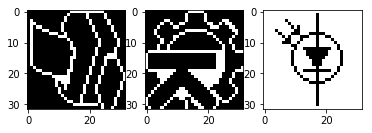

In [15]:
for i in range(3):
    p = data[i]
    plt.subplot(131 + i)
    plt.imshow(p.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
    
plt.show()

In [16]:
X = np.array([p1, p2, p3]).T
model = HopfieldNetwork()
model.train(X)

In [17]:
# 1. Check that the three patterns are stable

In [18]:
for i in range(3):
    rp = model.update_async(data[i])
    print(rp, (rp == data[i]).all())

[-1. -1. -1. ... -1. -1. -1.] True
[-1. -1. -1. ... -1. -1. -1.] True
[1. 1. 1. ... 1. 1. 1.] True


In [19]:
# 2. Try if the network can complete degraded patterns: p10 and p11

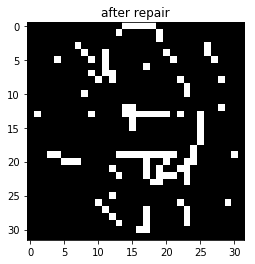

In [20]:
p10, p11 = data[9], data[10]
plt.imshow(p10.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("before repair")
plt.show()
rp10 = model.update_async(p10)
plt.imshow(rp10.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("after repair")
plt.show()

True


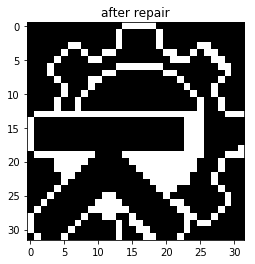

In [21]:
rp11 = model.update_async(p11)
print((rp11 == p2).all())

plt.imshow(p11.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("before repair")
plt.show()

plt.imshow(rp11.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("after repair")
plt.show()

In [22]:
# 3. Select units randomly, calculate the new states and repeat the process

## 3.3 Energy

In [23]:
# 1. What is the energy at the different attractors?

In [24]:
# find out all the undistored patterns
for i in range(11):
    p = data[i]
    rp = model.update_async(p)
    print(i + 1, (p == rp).all())

1 True
2 True
3 True
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False


In [25]:
for i in range(3):
    p = data[i]
    print(model.energyOf(p))

-490288.00000000006
-465114.66666666674
-498090.6666666668


In [26]:
# 2. What is the energy of the distorted patterns?

In [27]:
for i in range(3, 11):
    p = data[i]
    print(model.energyOf(p))

-244900.00000000003
-178480.0
-232208.0
-233038.6666666667
-57530.66666666667
-90286.66666666667
-140964.0
-58197.333333333314


In [28]:
# 3. Follow the energy changes during sequential update

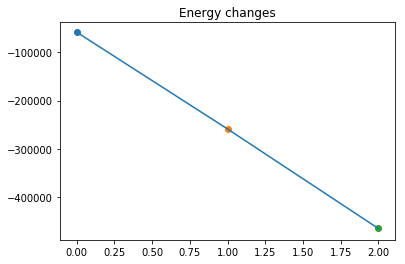

In [29]:
energy_log = []
model.update_async(data[10], log=energy_log)
model.plot_energy(energy_log)

In [30]:
# 4. Generate a random weight matrix and iterate an arbitrary random state

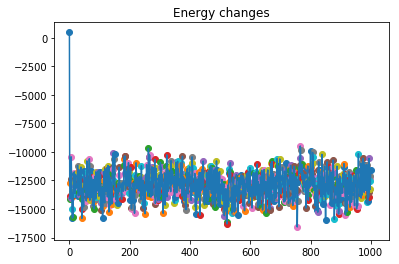

In [31]:
np.random.seed(0)
W = np.random.normal(0, 1, (1024, 1024))
np.random.seed(1)
p_start = np.sign(np.random.normal(0, 1, 1024))
model.W = W
energy_log = []
rp = model.update_async(p_start, log=energy_log)
model.plot_energy(energy_log)

In [32]:
# 5. Make thw weight matrix symmetrix and find out what will happen and why that happens.

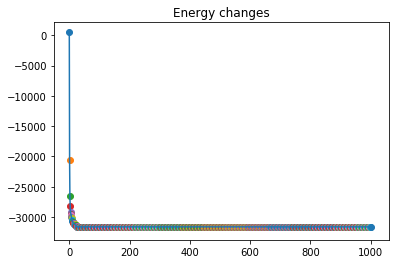

In [33]:
W = 0.5 * (W + W.T)
model.W = W
energy_log = []
rp = model.update_async(p_start, log=energy_log)
model.plot_energy(energy_log)

## 3.4 Distortion Resistance

In [34]:
# 1. Add noise to p1, p2, p3 and see how much noise can be removed.

In [35]:
def add_noise(arr: np.ndarray, ratio: float):
    """
    Randomly flip a selected number of units
    :param arr: the array to add noise
    :param ratio: the ratio of noise
    :return: the array with noise
    """
    p = np.copy(arr)
    n = len(p)
    permutation = [i for i in range(n)]
    m = int(n * ratio)
    np.random.seed(2)
    indices = np.random.choice(permutation, m)
    for index in indices:
        p[index] = - p[index]

    return p

In [36]:
def repair_degree(p1, p2):
    return 1 - 0.5 * np.sum(np.abs(p1 - p2)) / 1024

In [37]:
ratio = np.linspace(0.2, 1, 5)

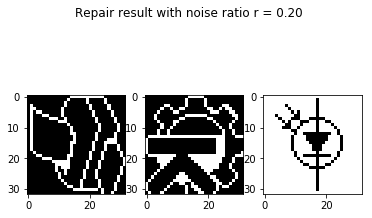

Repair degree:  1.0 1.0 1.0


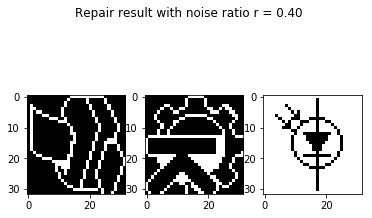

Repair degree:  1.0 1.0 1.0


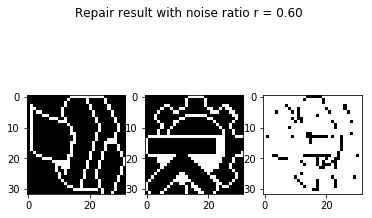

Repair degree:  1.0 1.0 0.8818359375


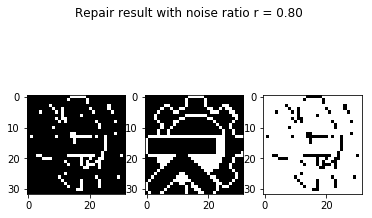

Repair degree:  0.8681640625 1.0 0.8818359375


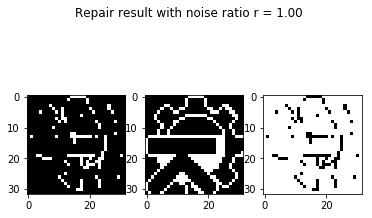

Repair degree:  0.8681640625 1.0 0.8818359375


In [38]:
model.train(X)
for r in ratio:
    p1_noise = add_noise(p1, r)
    p2_noise = add_noise(p2, r)
    p3_noise = add_noise(p3, r)
    rp1 = model.update_sync(p1_noise)
    rp2 = model.update_sync(p2_noise)
    rp3 = model.update_sync(p3_noise)

    fig = plt.figure()
    fig.suptitle("Repair result with noise ratio r = %.2f" % r)
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    ax1.imshow(rp1.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
    ax2.imshow(rp2.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
    ax3.imshow(rp3.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
    plt.show()

    degree1 = repair_degree(p1, rp1)
    degree2 = repair_degree(p2, rp2)
    degree3 = repair_degree(p3, rp3)

    print("Repair degree: ", degree1, degree2, degree3)

In [39]:
# 2. Find out the difference between the attractors with regard to noise tolerance

In [40]:
# 3. Find out if the network always converge to the right attractor

## 3.5 Capacity

In [41]:
# 1. How many patterns can be safely stored? Add more patterns and check performance after each addition

In [42]:
for j in range(4, 12):
    X = np.array(data[:j]).T
    model.train(X)
    degree = []
    for i in range(j):
        p = data[i]
        p_noise = add_noise(p, 0.3)
        rp = model.update_sync(p_noise)
        d = repair_degree(p, rp)
        degree.append(d)
    print(degree)

[0.8984375, 0.8603515625, 0.951171875, 0.919921875]
[0.91796875, 0.89453125, 0.921875, 0.912109375, 0.8857421875]
[0.8564453125, 0.810546875, 0.9287109375, 0.892578125, 0.85546875, 0.8759765625]
[0.8671875, 0.82421875, 0.916015625, 0.875, 0.8564453125, 0.8779296875, 0.8916015625]
[0.85498046875, 0.80517578125, 0.9208984375, 0.8857421875, 0.849609375, 0.876953125, 0.8876953125, 0.822265625]
[0.857421875, 0.8173828125, 0.91796875, 0.8740234375, 0.8447265625, 0.8720703125, 0.8818359375, 0.8232421875, 0.8134765625]
[0.8701171875, 0.8115234375, 0.916015625, 0.8720703125, 0.8427734375, 0.873046875, 0.87890625, 0.8232421875, 0.8115234375, 0.84375]
[0.869140625, 0.841796875, 0.9189453125, 0.8701171875, 0.8427734375, 0.8720703125, 0.880859375, 0.8125, 0.818359375, 0.8369140625, 1.0]


In [43]:
# 2. Repeat with learning random patterns

In [44]:
# generate random patterns
n = 5
ps = []
for i in range(n):
    p = np.sign(np.random.normal(0, 1, 100))
    ps.append(p)
X = np.array(ps).T
model.train(X)

# iterate on the distored patterns
degree = []
for i in range(n):
    p = X[:, i]
    p_noise = add_noise(p, 0.3)
    rp = model.update_async(p_noise)
    d = repair_degree(p, rp)
    degree.append(d)
print(degree)

[1.0, 1.0, 1.0, 1.0, 1.0]


In [45]:
# 3. How to explain the differences between random patterns and pictures?

In [46]:
# 4. What happens with the number of stable patterns as more are learned?

In [47]:
# generate and try different stable patterns
log = []
np.random.seed(5)
X = np.sign(np.random.normal(0, 1, (100, 300)))
for i in range(2, 300):
    model.train(X[:, :i])
    cnt = 0
    for j in range(i - 1):
        p = X[:, j]
        rp = model.update_sync(p)
        cnt += 1 if (p == rp).all() else 0
    log.append(cnt)

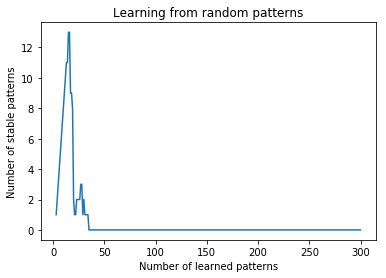

In [48]:
# visualize the results
plt.plot(np.linspace(3, 300, 298), log)
plt.xlabel("Number of learned patterns")
plt.ylabel("Number of stable patterns")
plt.title("Learning from random patterns")
plt.show()

In [49]:
# 5. What happens if noise is introduced to the patterns

In [50]:
# generate patterns and add noise
log = []
np.random.seed(5)
X = np.sign(np.random.normal(0, 1, (100, 300)))
for i in range(2, 300):
    model.train(X[:, :i])
    cnt = 0
    for j in range(i - 1):
        p = X[:, j]
        p_noise = add_noise(p, 0.2)
        rp = model.update_sync(p_noise)
        cnt += 1 if (p == rp).all() else 0
    log.append(cnt)

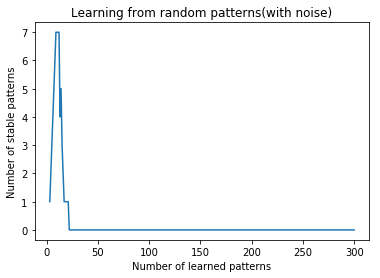

In [53]:
# visualize the results
plt.plot(np.linspace(3, 300, 298), log)
plt.xlabel("Number of learned patterns")
plt.ylabel("Number of stable patterns")
plt.title("Learning from random patterns(with noise)")
plt.show()

In [54]:
# 6. What is the number of retrievable patterns for this network?

In [55]:
# 7. 

## 3.6 Sparse Patterns

In [56]:
# 1. Generate sparse patterns with 10% activity and how many can be stored w.r.t different theta

In [57]:
N = 100  # number of units
P = 20  # number of patterns
p = 0.1
ones = np.ones(int(p * N))
zeros = np.zeros(N - int(p * N))
x = np.concatenate((ones, zeros))
X = []
for i in range(P):
    np.random.seed(P + i)
    X.append(np.random.permutation(x))
X = np.array(X).T

In [ ]:
# 2. What about even sparser patterns?